In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [23]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [11]:
1/np.mean(my_data)
np.sum(my_data)

(3**20*exp(3*(-3.93)))/(5.089**20*exp(5.089*(-3.93)))

-2*np.log(0.0944)

4.7204284116613637

$$\Lambda=\frac{{\lambda_0}^{n}e^{\lambda_0\Sigma X_i}}{{\lambda_{MLE}}^{n}e^{\lambda_{MLE}\Sigma X_i}}$$

$$=\frac{3^{20}e^{-3.93*3}}{5.089^{20}e^{-3.93*5.089}}$$

$$\Lambda=0.0944$$

$$-2\log(\Lambda)=4.72$$

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [31]:
print('Finding the p-value:')
print(1-stats.chi2.cdf(4.72,df=1))

stats.chi2.ppf(0.95,df=1)

Finding the p-value:
0.0298137431406


3.8414588206941236

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [61]:
n=20
lam0=3
crit=3.84145

ts=[]



for i in np.arange(10000):
    sample=stats.expon.rvs(scale=1/5,size=n)
    lambdaMle=1/np.mean(sample)
    sumsample=np.sum(sample)
    test_stat=(lam0**n*exp(lam0*(-sumsample)))/(lambdaMle**n*exp(lambdaMle*(-sumsample)))
    ts=np.append(ts,-2*np.log(test_stat))
    
np.mean(ts>=crit)

0.60229999999999995

Repeat for a sample size of 50. What do you expect to happen to power? 

The increase in sample size increased the power from apprximately 0.60 to 0.95, as expected

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

P-Value equals: 
0.0003


(array([1.320e+02, 1.114e+03, 2.829e+03, 3.019e+03, 1.758e+03, 7.750e+02,
        2.680e+02, 8.300e+01, 1.900e+01, 3.000e+00]),
 array([-1.09618706, -0.7570177 , -0.41784834, -0.07867897,  0.26049039,
         0.59965975,  0.93882912,  1.27799848,  1.61716784,  1.95633721,
         2.29550657]),
 <a list of 10 Patch objects>)

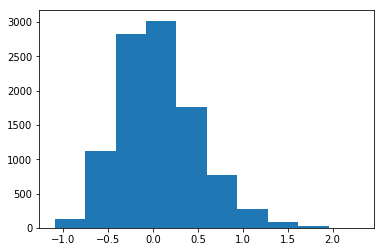

In [72]:
n=50
ts1=[]

for i in np.arange(10000):
    sample1=stats.expon.rvs(scale=1/3,size=n)
    tStat=(1/np.mean(sample1))-3
    ts1=np.append(ts1,tStat)

sampleTest=(1/np.mean(my_data))-3

print('P-Value equals: ')
print(np.mean(ts1>=sampleTest)+np.mean(ts1<=-sampleTest))
plt.hist(ts1)

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [51]:
print('Values outside of this interval will cause H_0 to be rejected given an alpha value of 0.05 for n = 20:')
print(np.percentile(ts1,2.5))
print(np.percentile(ts1,97.5))

Values outside of this interval will cause H_0 to be rejected given an alpha value of 0.05:
-0.972475855822178
1.9290818272254238


In [77]:
print('Values outside of this interval will cause H_0 to be rejected given an alpha value of 0.05 for n = 50:')
print(np.percentile(ts1,2.5))
print(np.percentile(ts1,97.5))

Values outside of this interval will cause H_0 to be rejected given an alpha value of 0.05 for n = 50:
-0.6916795445449857
1.0487750942070322


Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [71]:
ts=[]
n=20

for i in np.arange(10000):
    sample=stats.expon.rvs(scale=1/5,size=n)
    test_stat=(1/np.mean(sample))-3
    ts=np.append(ts,test_stat)

np.mean(ts>=np.percentile(ts1,97.5))+np.mean(ts<=np.percentile(ts1,2.5))

0.5574

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [84]:
ts=[]
n=50

for i in np.arange(10000):
    sample=stats.expon.rvs(scale=1/5,size=n)
    test_stat=(1/np.mean(sample))-3
    ts=np.append(ts,test_stat)
    
np.mean(ts>=upper50)+np.mean(ts1<=lower50)

0.9679